In [5]:
#Always import the following Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(color_codes = True)
pd.options.display.float_format = '{:.4f}'.format

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


from IPython.core.display import display, HTML
display(HTML('<style>.container {width:98%  !important}</style>'))

#### The below are the example to read json file

In [6]:
#The below is only for example sake:

biz_file= open('yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

#### Bin the values of a field based on dynamic binning

In [7]:
#Bin the values of a field based on dynamic binning
#we prefere this as the fixed binning might result in empty bins.

#bins - represent the bins boundaries in which i have divided the values.
#deciles - mapping of the rows to the bins.
#biz_df['review_count'] is an example field of type numeric.

deciles, bins = pd.qcut(biz_df['review_count'], 10, labels = False, duplicates = 'drop', retbins = True)

#### The below is the example of plotting the bins to the data field:

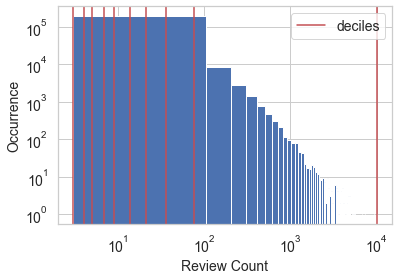

In [9]:
#The below is the example of plotting the bins to the data field:
sns.set_style('whitegrid');
fig, ax = plt.subplots();
biz_df['review_count'].hist(ax=ax, bins=100);
for pos in bins:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14);
ax.set_yscale('log');
ax.set_xscale('log');
ax.tick_params(labelsize=14);
ax.set_xlabel('Review Count', fontsize=14);
ax.set_ylabel('Occurrence', fontsize=14);

#### The below is the example log transformation 

In [2]:
# The addition of 1 is to ensure that the values does not go to infinity in case the value is zero.

news_df['log_n_tokens_content'] = np.log10(news_df['n_tokens_content'] + 1)

NameError: name 'np' is not defined

#### The below example of the graph of field distribution before and after log transformation

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(15, 5),nrows=1,ncols= 2)
news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)
news_df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

#### The below is the example of scatter plot between the target and the field before and after log transforamtion

In [ ]:
fig2, (ax1, ax2) = plt.subplots(figsize=(15, 5),nrows=1,ncols= 2)
ax1.scatter(news_df['n_tokens_content'], news_df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)
ax2.scatter(news_df['log_n_tokens_content'], news_df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

#### When data is :
1. all positive
2. highly skewed, we can use box cox transformation. 
3. from scipy import stats


In [ ]:
biz_df['rc_log'], log_params = stats.boxcox(biz_df['review_count'])